### Introduction
In this notebook I am exploring few NLP papers dataset. I am doing text analysis on paper Abstracts & Titles using nltk for text preprocessing, Topic modeling using LDA & NMF, Paper similarity analysis using TF-IDF vectors. 

Please share your valuable feedback & upvote if you learn something new today from this analysis. 


In [1]:
import pandas as pd 
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import gensim
import gensim.corpora as corpora
import re
import numpy as np
from pprint import pprint
import pyLDAvis
import pyLDAvis.gensim
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)  

/opt/conda/lib/python3.6/site-packages/smart_open/ssh.py:34: UserWarning: paramiko missing, opening SSH/SCP/SFTP paths will be disabled.  `pip install paramiko` to suppress
  warnings.warn('paramiko missing, opening SSH/SCP/SFTP paths will be disabled.  `pip install paramiko` to suppress')


In [2]:
papers = pd.read_csv('../input/201812_CL_Github.csv')

In [3]:
papers.head()

,Abstract,Arxiv Link,Github Link,ID,Title
0,Discourse structures are beneficial for vari...,http://arxiv.org/abs/1812.00176,github.com/irit-melodi/irit-stac,1812.00176,A Deep Sequential Model for Discourse Parsing ...
1,Learning good representations is of crucial ...,http://arxiv.org/abs/1812.00271,github.com/mravanelli/SincNet/,1812.00271,Learning Speaker Representations with Mutual I...
2,The explosive growth in fake news and its er...,http://arxiv.org/abs/1812.00315,github.com/borisveytsman/acmart/issues/138,1812.00315,"Fake News: A Survey of Research, Detection Met..."
3,The amount of dialogue history to include in...,http://arxiv.org/abs/1812.00350,github.com/keras-team/keras,1812.00350,A Study on Dialogue Reward Prediction for Open...
4,Detecting controversy in general web pages i...,http://arxiv.org/abs/1812.00382,github.com/aboSamoor/polyglot,1812.00382,Improved and Robust Controversy Detection in G...


In [4]:
papers.shape
#Total 106 papers given

(106, 5)

In [5]:
papers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 5 columns):
Abstract       106 non-null object
Arxiv Link     106 non-null object
Github Link    106 non-null object
ID             106 non-null float64
Title          106 non-null object
dtypes: float64(1), object(4)
memory usage: 4.2+ KB


#### Data Preprocessing

In [6]:
#Removing symbols from Abstracts

papers['Abstract_Cleaned'] = papers.apply(lambda row: (re.sub("[^A-Za-z0-9' ]+", ' ', row['Abstract'])),axis=1)

In [7]:
# Tokenization

papers['Abstract_Cleaned'] = papers.apply(lambda row: (word_tokenize(row['Abstract_Cleaned'])), axis = 1)

In [8]:
# Removing Stopwords

stop_words = set(stopwords.words('english'))
papers['Abstract_Cleaned'] = papers.apply(lambda row: ([w for w in row['Abstract_Cleaned'] if w not in stop_words]),axis=1)

In [9]:
# Lemmatization

lmtzr = WordNetLemmatizer()
papers['Abstract_Cleaned'] = papers.apply(lambda row: ([lmtzr.lemmatize(w) for w in row['Abstract_Cleaned']]), axis=1)

In [10]:
papers['Abstract_Cleaned'][1][:20]

['Learning',
 'good',
 'representation',
 'crucial',
 'importance',
 'deep',
 'learning',
 'Mutual',
 'Information',
 'MI',
 'similar',
 'measure',
 'statistical',
 'dependence',
 'promising',
 'tool',
 'learning',
 'representation',
 'unsupervised',
 'way']

#### Building LDA Topic Model

In [11]:
# Creating Dictionary and Corpus

dictionary = corpora.Dictionary(papers['Abstract_Cleaned'])
texts = papers['Abstract_Cleaned']
corpus = [dictionary.doc2bow(text) for text in papers['Abstract_Cleaned']]

In [12]:
# Building LDA Model

lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=dictionary,
                                           num_topics=10, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [13]:
# Printing the Keywords in topics

pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.037*"language" + 0.037*"2018" + 0.035*"training" + 0.029*"et" + '
  '0.028*"al" + 0.026*"benefit" + 0.024*"pre" + 0.024*"F1" + 0.024*"ELMo" + '
  '0.014*"result"'),
 (1,
  '0.041*"capsule" + 0.039*"model" + 0.024*"based" + 0.024*"joint" + '
  '0.023*"segmentation" + 0.023*"word" + 0.022*"dependency" + '
  '0.020*"Vietnamese" + 0.020*"tagging" + 0.020*"POS"'),
 (2,
  '0.022*"ten" + 0.022*"optimize" + 0.008*"user" + 0.008*"word" + 0.006*"bias" '
  '+ 0.005*"XiaoIce" + 0.005*"rank" + 0.005*"social" + 0.005*"language" + '
  '0.005*"We"'),
 (3,
  '0.000*"representation" + 0.000*"user" + 0.000*"model" + 0.000*"method" + '
  '0.000*"task" + 0.000*"text" + 0.000*"training" + 0.000*"We" + 0.000*"data" '
  '+ 0.000*"feature"'),
 (4,
  '0.039*"language" + 0.027*"task" + 0.023*"representation" + '
  '0.023*"publication" + 0.019*"cross" + 0.013*"recommendation" + '
  '0.013*"proposed" + 0.013*"model" + 0.013*"method" + 0.012*"variable"'),
 (5,
  '0.029*"question" + 0.023*"visual" + 0.021*

In [14]:
# Visualizing topics using pyLDAvis

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary)
vis

/opt/conda/lib/python3.6/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
8      0.056252 -0.059163       1        1  56.092018
5     -0.189944 -0.054510       2        1   9.209870
7     -0.099680 -0.019170       3        1   8.476099
4      0.276420 -0.070551       4        1   7.483122
9      0.017224 -0.179198       5        1   6.514017
1      0.035923  0.149762       6        1   4.464728
2     -0.051565  0.018393       7        1   4.054748
0      0.051681  0.195798       8        1   2.273969
6     -0.055422  0.009422       9        1   1.415060
3     -0.040888  0.009218      10        1   0.016368, topic_info=     Category        Freq            Term       Total  loglift  logprob
term                                                                   
723   Default   76.000000       attention   76.000000  30.0000  30.0000
641   Default   86.000000        language   86.000000  29.0000  29.0000
43    Default  184.000000           model  184.000000  28.0000  28.0000
285   Default   45.000000        training   45.000000  27.0000  27.0000
298   Default   67.000000           based   67.000000  26.0000  26.0000
68    Default   91.000000            task   91.000000  25.0000  25.0000
87    Default  106.000000              We  106.000000  24.0000  24.0000
362   Default   47.000000            word   47.000000  23.0000  23.0000
341   Default   63.000000          neural   63.000000  22.0000  22.0000
336   Default  115.000000          method  115.000000  21.0000  21.0000
139   Default   43.000000  representation   43.000000  20.0000  20.0000
958   Default   28.000000            self   28.000000  19.0000  19.0000
56    Default   41.000000        question   41.000000  18.0000  18.0000
164   Default   41.000000          vector   41.000000  17.0000  17.0000
570   Default   52.000000         propose   52.000000  16.0000  16.0000
2434  Default   21.000000         capsule   21.000000  15.0000  15.0000
282   Default   53.000000          system   53.000000  14.0000  14.0000
63    Default   55.000000            show   55.000000  13.0000  13.0000
168   Default   28.000000            work   28.000000  12.0000  12.0000
564   Default   39.000000             new   39.000000  11.0000  11.0000
140   Default   40.000000          result   40.000000  10.0000  10.0000
102   Default   21.000000    distribution   21.000000   9.0000   9.0000
1385  Default   25.000000          visual   25.000000   8.0000   8.0000
816   Default   43.000000           novel   43.000000   7.0000   7.0000
64    Default   31.000000           state   31.000000   6.0000   6.0000
44    Default   59.000000           multi   59.000000   5.0000   5.0000
943   Default   25.000000       benchmark   25.000000   4.0000   4.0000
85    Default   34.000000             Our   34.000000   3.0000   3.0000
18    Default   27.000000             art   27.000000   2.0000   2.0000
2822  Default   22.000000           scene   22.000000   1.0000   1.0000
...       ...         ...             ...         ...      ...      ...
139   Topic10    0.000651  representation   43.422451  -2.3900  -7.9480
444   Topic10    0.000651            user   26.196070  -1.8848  -7.9482
43    Topic10    0.000651           model  184.957840  -3.8394  -7.9482
336   Topic10    0.000651          method  115.173729  -3.3658  -7.9483
68    Topic10    0.000651            task   91.482925  -3.1355  -7.9483
354   Topic10    0.000651            text   36.291649  -2.2109  -7.9483
285   Topic10    0.000651        training   45.999893  -2.4480  -7.9483
87    Topic10    0.000651              We  106.656151  -3.2890  -7.9483
310   Topic10    0.000651            data   48.393917  -2.4988  -7.9483
107   Topic10    0.000651         feature   30.159273  -2.0260  -7.9484
341   Topic10    0.000651          neural   63.284885  -2.7671  -7.9484
1043  Topic10    0.000651        document    7.168643  -0.5892  -7.9484
23    Topic10    0.000651  classification   23.744520  -1.7869  -7.94

#### Abstracts TF-IDF


In [15]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

abstracts = papers['Abstract'].values

count_vectorizer = CountVectorizer()
counts = count_vectorizer.fit_transform(abstracts)
tfidf_vectorizer = TfidfTransformer().fit(counts)
tfidf_abstracts = tfidf_vectorizer.transform(counts)

In [16]:
tfidf_abstracts.shape

(106, 2962)

#### Affinity Propogation

In [17]:
#Testing affinity propogation on abstracts tfidf(experimental)

from sklearn.cluster import AffinityPropagation

X = tfidf_abstracts
clustering = AffinityPropagation().fit(X)
clustering 

AffinityPropagation(affinity='euclidean', convergence_iter=15, copy=True,
          damping=0.5, max_iter=200, preference=None, verbose=False)

In [18]:
abstract_affinity_clusters = list(clustering.labels_)
abstract_affinity_clusters

[16,
 0,
 13,
 1,
 9,
 9,
 10,
 4,
 13,
 9,
 15,
 13,
 1,
 0,
 14,
 13,
 2,
 10,
 12,
 3,
 4,
 13,
 3,
 4,
 9,
 13,
 7,
 13,
 1,
 10,
 1,
 14,
 14,
 16,
 5,
 4,
 4,
 8,
 11,
 5,
 0,
 15,
 3,
 9,
 7,
 4,
 0,
 16,
 12,
 13,
 15,
 5,
 15,
 6,
 6,
 7,
 10,
 8,
 4,
 9,
 10,
 1,
 7,
 0,
 10,
 8,
 15,
 14,
 8,
 4,
 5,
 0,
 15,
 11,
 1,
 4,
 11,
 11,
 12,
 9,
 14,
 11,
 13,
 15,
 5,
 5,
 4,
 9,
 14,
 14,
 15,
 15,
 1,
 15,
 8,
 15,
 3,
 9,
 13,
 16,
 16,
 16,
 10,
 15,
 8,
 15]

In [19]:
len(set(abstract_affinity_clusters))

17

Lets try topic modeling again with number of topics equal to clusters found by affinity propogation algorithm

In [20]:
# Building LDA Model

lda_model_17 = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=dictionary,
                                           num_topics=17, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [21]:
# Visualizing topics using pyLDAvis

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model_17, corpus, dictionary)
vis

/opt/conda/lib/python3.6/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
8      0.173717 -0.038321       1        1  46.746563
10     0.257603 -0.135440       2        1   8.035979
9      0.096758  0.127033       3        1   7.110617
5     -0.055374 -0.113126       4        1   6.274823
4      0.230709  0.157504       5        1   5.033445
7     -0.007604 -0.244038       6        1   4.200558
6     -0.058822  0.010875       7        1   4.072256
16     0.036851 -0.022929       8        1   3.562821
1     -0.082148  0.027180       9        1   2.511178
2     -0.081449  0.009147      10        1   2.228604
12    -0.086061  0.042716      11        1   2.201325
13    -0.094336  0.020905      12        1   2.169916
15    -0.091093 -0.006561      13        1   2.006302
14    -0.091205  0.029459      14        1   1.871884
0     -0.002996  0.098299      15        1   1.391342
11    -0.075817  0.020356      16        1   0.566357
3     -0.068734  0.016941      17        1   0.016025, topic_info=     Category        Freq            Term       Total  loglift  logprob
term                                                                   
641   Default  109.000000        language  109.000000  30.0000  30.0000
362   Default   48.000000            word   48.000000  29.0000  29.0000
43    Default  221.000000           model  221.000000  28.0000  28.0000
285   Default   43.000000        training   43.000000  27.0000  27.0000
68    Default  115.000000            task  115.000000  26.0000  26.0000
102   Default   36.000000    distribution   36.000000  25.0000  25.0000
2434  Default   31.000000         capsule   31.000000  24.0000  24.0000
56    Default   31.000000        question   31.000000  23.0000  23.0000
340   Default   50.000000         network   50.000000  22.0000  22.0000
282   Default   56.000000          system   56.000000  21.0000  21.0000
164   Default   49.000000          vector   49.000000  20.0000  20.0000
564   Default   41.000000             new   41.000000  19.0000  19.0000
1501  Default   31.000000   probabilistic   31.000000  18.0000  18.0000
336   Default   98.000000          method   98.000000  17.0000  17.0000
168   Default   27.000000            work   27.000000  16.0000  16.0000
723   Default  134.000000       attention  134.000000  15.0000  15.0000
298   Default   59.000000           based   59.000000  14.0000  14.0000
9     Default   66.000000             The   66.000000  13.0000  13.0000
10    Default   46.000000            This   46.000000  12.0000  12.0000
139   Default   54.000000  representation   54.000000  11.0000  11.0000
140   Default   48.000000          result   48.000000  10.0000  10.0000
64    Default   41.000000           state   41.000000   9.0000   9.0000
18    Default   35.000000             art   35.000000   8.0000   8.0000
87    Default  112.000000              We  112.000000   7.0000   7.0000
2131  Default   16.000000    segmentation   16.000000   6.0000   6.0000
310   Default   47.000000            data   47.000000   5.0000   5.0000
44    Default   38.000000           multi   38.000000   4.0000   4.0000
1385  Default   24.000000          visual   24.000000   3.0000   3.0000
38    Default   56.000000     information   56.000000   2.0000   2.0000
341   Default   47.000000          neural   47.000000   1.0000   1.0000
...       ...         ...             ...         ...      ...      ...
139   Topic17    0.000638  representation   54.427872  -2.6159  -7.9480
444   Topic17    0.000638            user   27.593485  -1.9367  -7.9480
68    Topic17    0.000637            task  115.099327  -3.3651  -7.9482
796   Topic17    0.000637            bias    4.939734  -0.2167  -7.9483
107   Topic17    0.000637         feature   30.750990  -2.0453  -7.9483
822   Topic17    0.000637            rank    2.963176   0.2943  -7.9483
87    Topic17    0.000637              We  112.226036  -3.3400  -7.9484
23    Topic17    0.000637  classification   21.4449

#### Mapping Top Topics & Abstracts

But above visualization shows 9 dominant topic clusters

Lets check paper titles whose abstracts have maximum correspondence with top topic words, took below ideas from https://towardsdatascience.com/improving-the-interpretation-of-topic-models-87fd2ee3847d

In [22]:
from sklearn.decomposition import LatentDirichletAllocation

lda_model = LatentDirichletAllocation(n_topics=9, max_iter=10, learning_method='online', learning_offset=50.,random_state=0).fit(tfidf_abstracts)
lda_W = lda_model.transform(tfidf_abstracts)
lda_H = lda_model.components_
#Not sure how to find lda_W & lda_H using gensim lda model

In [23]:
def display_topics(H, W, feature_names, title_list, no_top_words, no_top_documents):
    for topic_idx, topic in enumerate(H):
        print('\n',"Topic %d:" % (topic_idx))
        print("Top Words: "," ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))
        top_doc_indices = np.argsort( W[:,topic_idx] )[::-1][0:no_top_documents]
        for doc_index in top_doc_indices:
            print(title_list[doc_index])
            
no_top_words = 15
no_top_documents = 4     
title_list = papers['Title'].tolist()
tf_feature_names = count_vectorizer.get_feature_names()
display_topics(lda_H, lda_W, tf_feature_names, title_list, no_top_words, no_top_documents)



 Topic 0:
Top Words:  the of more to mobile solve model learning frequencies our neurox techniques environments role these
A neural joint model for Vietnamese word segmentation, POS tagging and
  dependency parsing
Fake News: A Survey of Research, Detection Methods, and Opportunities
The USTC-NEL Speech Translation system at IWSLT 2018
Switch-LSTMs for Multi-Criteria Chinese Word Segmentation

 Topic 1:
Top Words:  the for of and filling answer include decoder characteristics leveraged driven needs in roles to
A neural joint model for Vietnamese word segmentation, POS tagging and
  dependency parsing
Fake News: A Survey of Research, Detection Methods, and Opportunities
The USTC-NEL Speech Translation system at IWSLT 2018
Switch-LSTMs for Multi-Criteria Chinese Word Segmentation

 Topic 2:
Top Words:  discourse cold access hard pairs play abnormal switched distributions 88 edus parameterize adopt members prioritize
A neural joint model for Vietnamese word segmentation, POS tagging and


In [24]:
from sklearn.decomposition import NMF

nmf_model = NMF(n_components=9, random_state=1, alpha=.1, l1_ratio=.5, init='nndsvd').fit(tfidf_abstracts)
nmf_W = nmf_model.transform(tfidf_abstracts)
nmf_H = nmf_model.components_

In [25]:
display_topics(nmf_H, nmf_W, tf_feature_names, title_list, no_top_words, no_top_documents)



 Topic 0:
Top Words:  the of and to in we for model on is our as with that language
Moment Matching Training for Neural Machine Translation: A Preliminary
  Study
What Is One Grain of Sand in the Desert? Analyzing Individual Neurons in
  Deep NLP Models
Von Mises-Fisher Loss for Training Sequence to Sequence Models with
  Continuous Outputs
Predicting user intent from search queries using both CNNs and RNNs

 Topic 1:
Top Words:  attention self vsam variables variational probabilistic vector by mechanism the distribution sum weights domain deterministic
Variational Self-attention Model for Sentence Representation
Supervised Domain Enablement Attention for Personalized Domain
  Classification
Self-Attention: A Better Building Block for Sentiment Analysis Neural
  Network Classifiers
Summarizing Videos with Attention

 Topic 2:
Top Words:  embedding word supervised tasks learning improved nlp from learns delta universal incorporated simultaneously give semantics
Delta Embedding Learning

#### Visualizing Similarity among Abstracts

In [26]:
from sklearn.metrics.pairwise import cosine_similarity, paired_cosine_distances

In [27]:
tfidf_abstracts_sim = []

for i in range(0,tfidf_abstracts.shape[0]):
    sim_array = cosine_similarity(tfidf_abstracts,tfidf_abstracts[i])
    sim_array = sim_array.flatten()
    tfidf_abstracts_sim.append(sim_array)
    
tfidf_abstracts_sim[0]

array([1.        , 0.12286413, 0.08184923, 0.15357629, 0.07470256,
       0.09456204, 0.09931655, 0.15082721, 0.16693596, 0.13764796,
       0.06447313, 0.10258284, 0.06923959, 0.08241206, 0.13347365,
       0.08177138, 0.04357318, 0.09571314, 0.10358585, 0.07234204,
       0.11081809, 0.0881691 , 0.13024676, 0.06377288, 0.16162853,
       0.12727135, 0.12502528, 0.0585923 , 0.14972991, 0.13035146,
       0.0628528 , 0.07986371, 0.06674029, 0.15260729, 0.08113397,
       0.12396959, 0.14360354, 0.12695053, 0.09659845, 0.10434579,
       0.09156838, 0.07218533, 0.10970231, 0.16733763, 0.09701165,
       0.06661113, 0.08456199, 0.13021511, 0.06303479, 0.11629068,
       0.05387719, 0.13199817, 0.10965459, 0.08141317, 0.05611269,
       0.12712924, 0.09497471, 0.14493045, 0.12596772, 0.15899208,
       0.1398379 , 0.15150927, 0.07885351, 0.11405947, 0.12220856,
       0.05803586, 0.08627678, 0.07659584, 0.10139142, 0.09280294,
       0.04579189, 0.10573221, 0.07817797, 0.06798766, 0.07396

In [28]:
tfidf_abstracts_sim_matrix =  np.array(tfidf_abstracts_sim)
tfidf_abstracts_sim_matrix.shape

(106, 106)

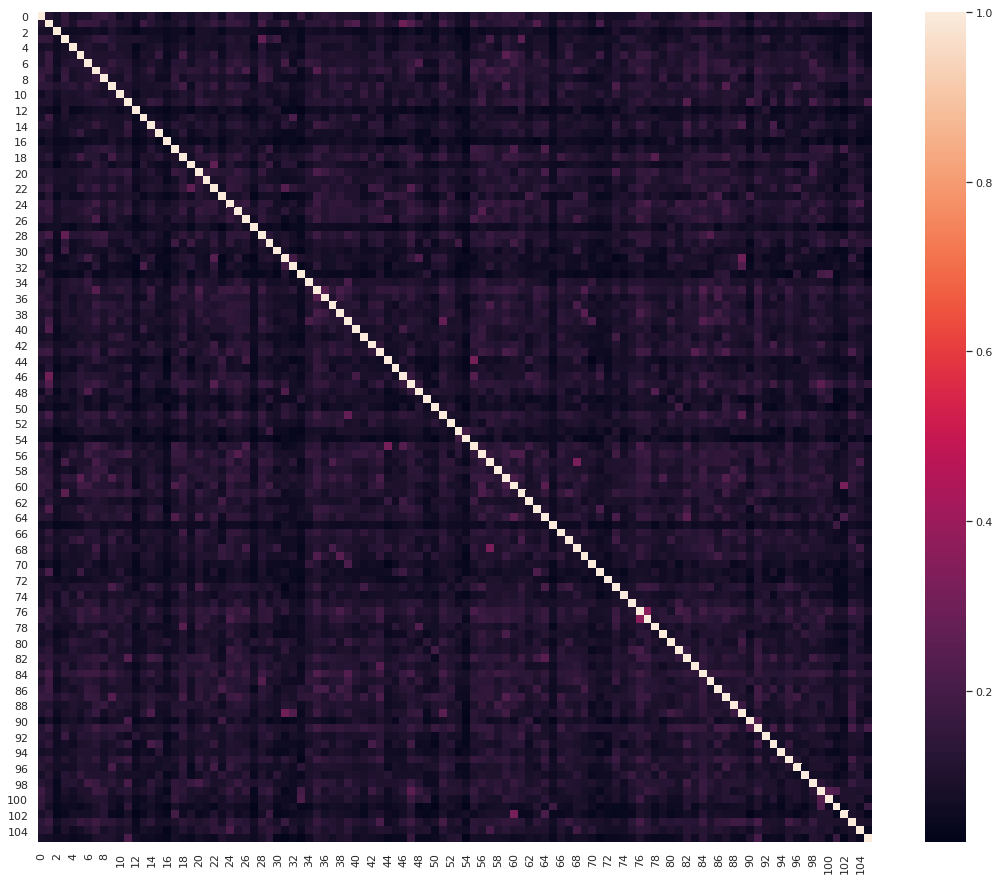

In [29]:
import seaborn as sns

sns.set(rc={'figure.figsize':(18.7,15.27)})
sns.heatmap(tfidf_abstracts_sim_matrix)

Testing a new semi-supervised learning approach to overcome limitations of Topic Models. This approach was published on medium blog: https://medium.com/pew-research-center-decoded/overcoming-the-limitations-of-topic-models-with-a-semi-supervised-approach-b947374e0455

This approach is based on ideas from paper "Anchored Correlation Explanation: Topic Modeling with Minimal Domain Knowledge" which were implemented in open source project "corextopic". 

In [30]:
!pip install corextopic

You are using pip version 19.0.3, however version 19.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [31]:
from corextopic import corextopic as ct

In [32]:
anchors = []
model = ct.Corex(n_hidden=5, seed=36)
model = model.fit(
    tfidf_abstracts,
    words=tf_feature_names
)

In [33]:
for i, topic_ngrams in enumerate(model.get_topics(n_words=10)):
    topic_ngrams = [ngram[0] for ngram in topic_ngrams if ngram[1] > 0]
    print("Topic #{}: {}".format(i+1, ", ".join(topic_ngrams)))

Topic #1: relation, conditional, clickbait, type, capsule, discourse, variable, dependency, masked, reside
Topic #2: criteria, visual, object, scene, dialog, asp, lstms, concepts, captioning, avsd
Topic #3: bias, controversy, medsim, rank, dimensionality, trade, variance, communicative, pages, controversies
Topic #4: reward, tartan, agent, xiaoice, sa, evomsa, toxicity, agents, pytext, adversarial
Topic #5: emotion, news, fake, urdu, aspect, grained, sentiment, annotations, popularity, twitter


In [34]:
# Anchors designed to nudge the model towards measuring specific genres
anchors = [
    ["adversarial","anomaly"],
    ["entity extraction","ner"],
    ["fake","news"],
    ["bias","dimensionality"],
    ["toxic","attack"]
]
anchors = [
    [a for a in topic if a in tf_feature_names]
    for topic in anchors
]

model = ct.Corex(n_hidden=5, seed=40)
model = model.fit(
    tfidf_abstracts,
    words=tf_feature_names,
    anchors=anchors, # Pass the anchors in here
    anchor_strength=3 # Tell the model how much it should rely on the anchors
)

In [35]:
for i, topic_ngrams in enumerate(model.get_topics(n_words=10)):
    topic_ngrams = [ngram[0] for ngram in topic_ngrams if ngram[1] > 0]
    print("Topic #{}: {}".format(i+1, ", ".join(topic_ngrams)))

Topic #1: adversarial, segmentation, criteria, tartan, clickbait, anomaly, instructions, binary, detectors, tokenization
Topic #2: ner, xiaoice, taxonomy, object, linguists, exposure, outlier, captioning, product, leaf
Topic #3: news, fake, medsim, probabilities, dnn, pytext, pg, keyword, experimentation, tokens
Topic #4: bias, conditional, dimensionality, controversy, anchor, sa, evomsa, emr, variable, asp
Topic #5: toxic, relation, discourse, capsule, toxicity, server, reside, client, noise, edu
